In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///./Resources/hawaii.sqlite")

In [5]:
# reflect an existing database into a new model
Base = automap_base()

# reflect the tables
Base.prepare(engine, reflect=True)

In [6]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [7]:
# Save references to each table
Measurements = Base.classes.measurement
Stations = Base.classes.station

In [8]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [9]:
# Find the most recent date in the data set.
recent_date = session.query(Measurements.date).order_by(Measurements.date.desc()).first()[0]
recent_date

'2017-08-23'

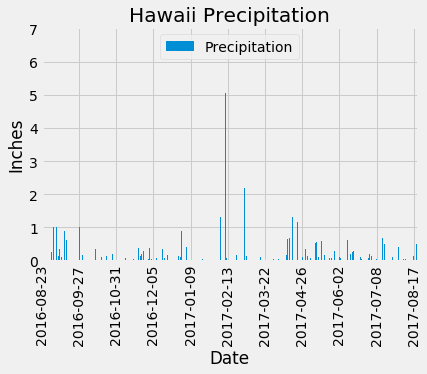

In [10]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 

# Calculate the date one year from the last date in data set.
date1 = recent_date.split("-")
year_ago = dt.date(int(date1[0]), int(date1[1]), int(date1[2])) - dt.timedelta(days=365)

# Perform a query to retrieve the data and precipitation scores
results = session.query(Measurements.date, Measurements.prcp).\
    filter(Measurements.date >= year_ago).all()

# Save the query results as a Pandas DataFrame and set the index to the date column
prcp = pd.DataFrame(results)
prcp = prcp.rename(columns={0: "Date", 1: "Precipitation"})

# Sort the dataframe by date
prcp = prcp.sort_values("Date")
prcp = prcp.dropna()

# Use Pandas Plotting with Matplotlib to plot the data
prcp.plot(kind="bar", x="Date", y="Precipitation", title="Hawaii Precipitation")
plt.xticks(np.arange(len(prcp), step=200), rotation=90, labels=prcp["Date"][::200])
plt.ylabel("Inches")
plt.show()

In [11]:
# Use Pandas to calcualte the summary statistics for the precipitation data
prcp.describe()

,Precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [12]:
# Design a query to calculate the total number stations in the dataset
num_stations = session.query(Stations.name).count()
num_stations

9

In [13]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.

most_active_station = session.query(Measurements.station, func.count(Measurements.station)).\
    group_by(Measurements.station).order_by(func.count(Measurements.station).desc()).all()
most_active_station

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [14]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
lowest_temp = session.query(Measurements.tobs, func.min(Measurements.tobs)).filter_by(station=most_active_station[0][0]).all()
highest_temp = session.query(Measurements.tobs, func.max(Measurements.tobs)).filter_by(station=most_active_station[0][0]).all()
average_temp = session.query(Measurements.tobs, func.avg(Measurements.tobs)).filter_by(station=most_active_station[0][0]).all()

print("The lowest temperature is:", lowest_temp[0][0])
print("The highest temperature is:", highest_temp[0][0])
print("The average temperature is:", average_temp[0][0])

The lowest temperature is: 54.0
The highest temperature is: 85.0
The average temperature is: 70.0


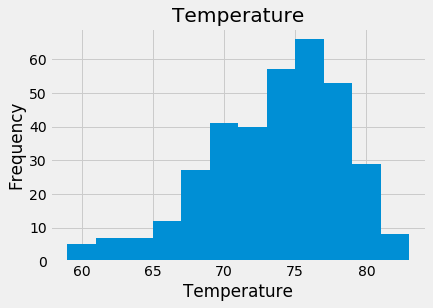

In [15]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
results2 = session.query(Measurements.date, Measurements.tobs).\
    filter_by(station='USC00519281').\
    filter(Measurements.date >= year_ago).all()
temp = pd.DataFrame(results2)
temp = temp.rename(columns={0: "Date", 1: "Temperature"})
temp.hist(bins=12)
plt.xlabel("Temperature")
plt.ylabel("Frequency")
plt.show()

# Close session

In [16]:
# Close Session
session.close()